# Tuncay Celik - Bike Demand Visualization Project

"Bike demand visualization project" is my EDA processbefore setting up a machine learning model. 

1- Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

2- Reading dataset

In [12]:
df=pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


3- Checking Missing and Duplicate values

In [14]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [15]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

4- Plotting colums

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

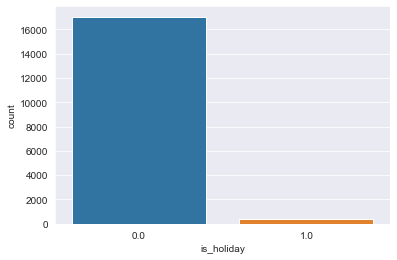

In [16]:
sns.countplot(x='is_holiday', data=df)

<AxesSubplot:xlabel='season', ylabel='count'>

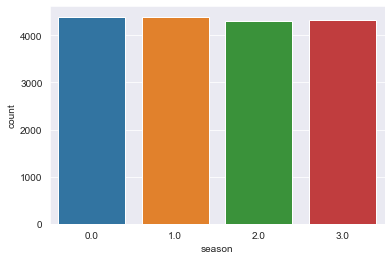

In [17]:
sns.countplot(x='season', data=df)

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

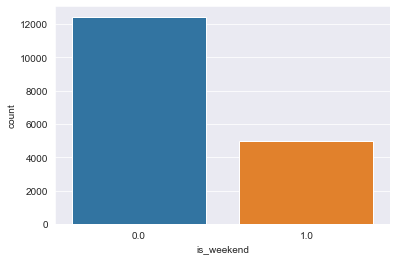

In [20]:
sns.countplot(x='is_weekend', data=df)

5- Feature Engineering Creating new colums

In [49]:
import datetime as dt
df2  =pd.read_csv('store_sharing.csv')
df2['timestamp'] =  pd.to_datetime(df2['timestamp'], infer_datetime_format=True)

df2["year"] = df2['timestamp'].dt.year
df2["month"] = df2['timestamp'].dt.month
df2["day"] = df2['timestamp'].dt.day
df2["day_of_week"] = df2['timestamp'].dt.dayofweek
df2["time"] = df2['timestamp'].dt.hour

df2["year_month"] = df2['timestamp'].apply(lambda x: x.strftime('%Y-%m'))

df2.set_index('timestamp',inplace=True)
df2

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,day_of_week,time,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,1,19,2017-01
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,1,20,2017-01
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,1,21,2017-01


6- Heatmap (Correlation)

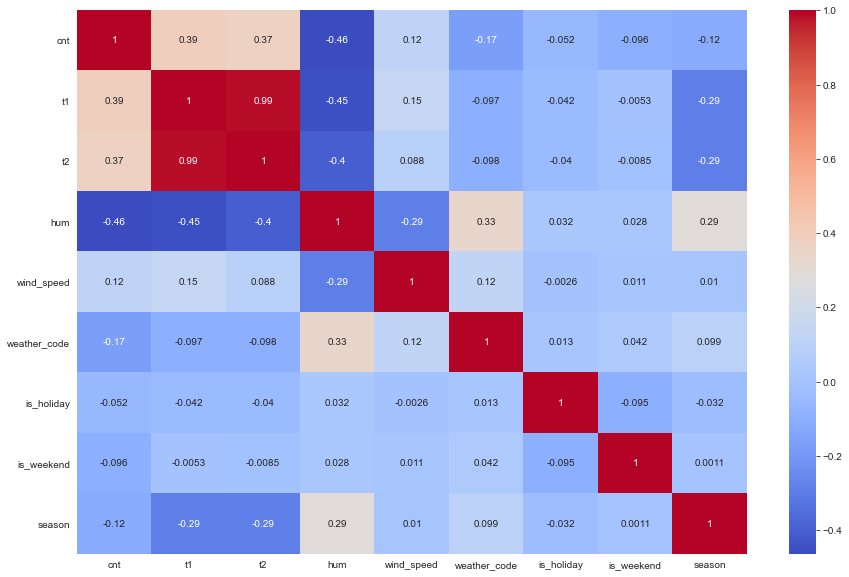

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

Correlation

In [31]:
df_corr_cnt = df.corr()[['cnt']].sort_values(by='cnt', ascending=False)
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
wind_speed,0.116295
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
weather_code,-0.166633
hum,-0.462901


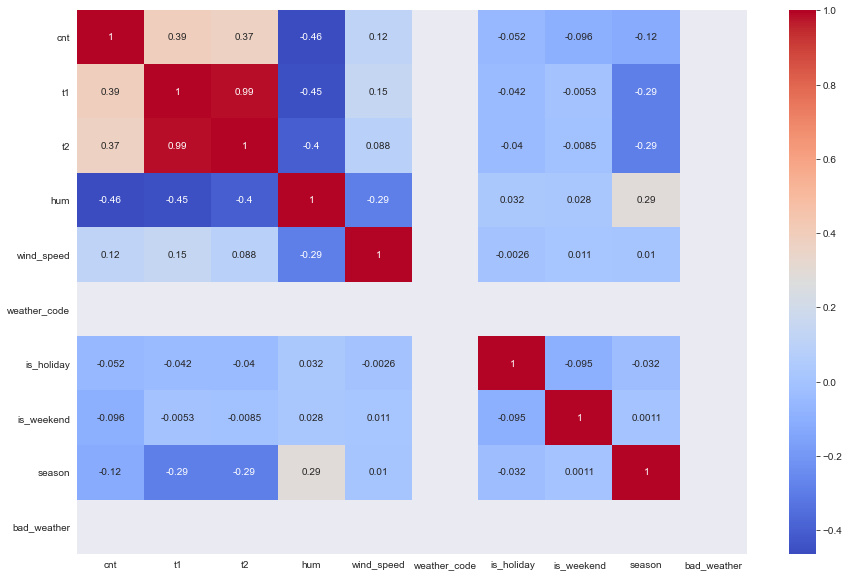

In [34]:
df['bad_weather']= df['weather_code']=4
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');

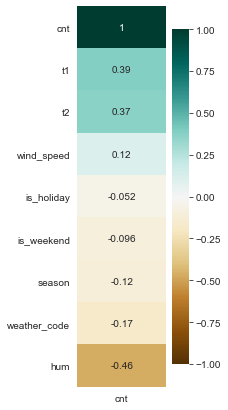

In [36]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt,vmin=-1, vmax=1,annot=True,cmap='BrBG');

7- Visualization with Barplot

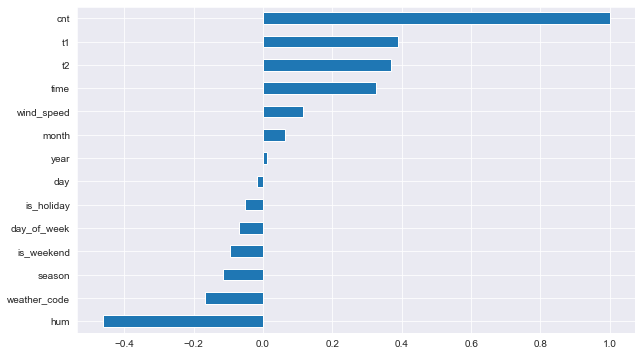

In [55]:
plt.figure(figsize=(10,6))
df2.corr()['cnt'].sort_values().plot.barh();

8- Visualization with Lineplot

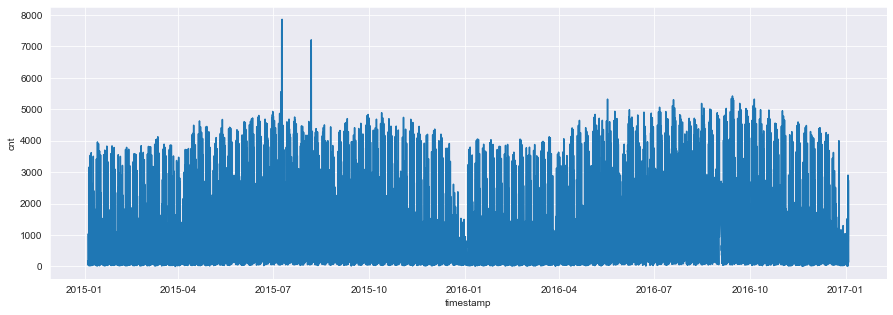

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y='cnt', data=df)
plt.show()

9- Plot bike share by time

In [52]:
df[df['cnt']<500][:5]
df[df['cnt']< min(df.cnt) + 50]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,bad_weather
timestamp,,,,,,,,,,
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,4,0.0,1.0,3.0,4
2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,4,0.0,1.0,3.0,4
2015-01-05 02:00:00,32,5.0,4.0,87.0,6.0,4,0.0,0.0,3.0,4
2015-01-05 03:00:00,22,6.0,4.5,84.0,7.5,4,0.0,0.0,3.0,4
2015-01-05 04:00:00,38,6.5,5.0,84.0,8.0,4,0.0,0.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...
2017-01-02 05:00:00,35,3.0,2.5,93.0,5.0,4,1.0,0.0,3.0,4
2017-01-03 01:00:00,49,1.0,-2.0,87.0,10.0,4,0.0,0.0,3.0,4
2017-01-03 02:00:00,43,0.5,-3.0,90.0,11.0,4,0.0,0.0,3.0,4


In [56]:
df_sum=pd.DataFrame(df2.groupby('year_month').cnt.sum())

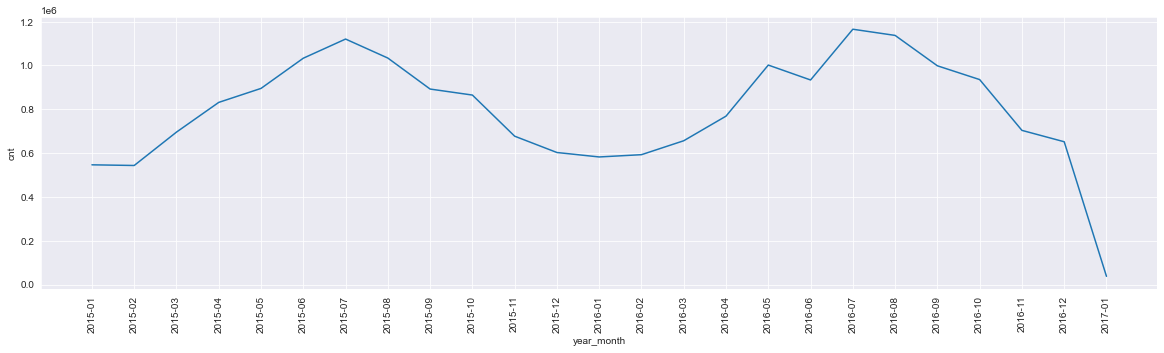

In [57]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='year_month', y='cnt',data=df_sum)
plt.xticks(rotation=90);

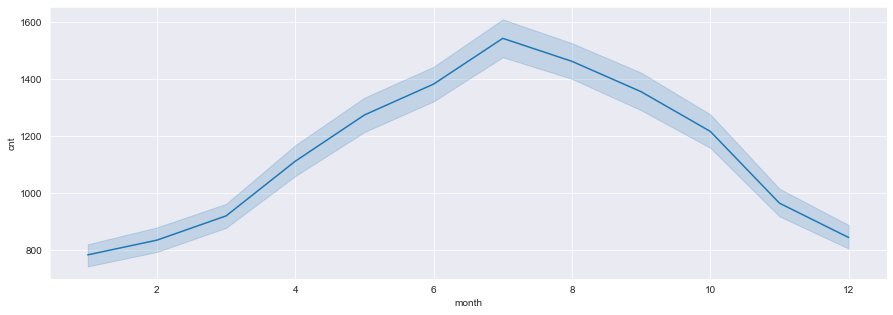

In [59]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='cnt',data=df2);

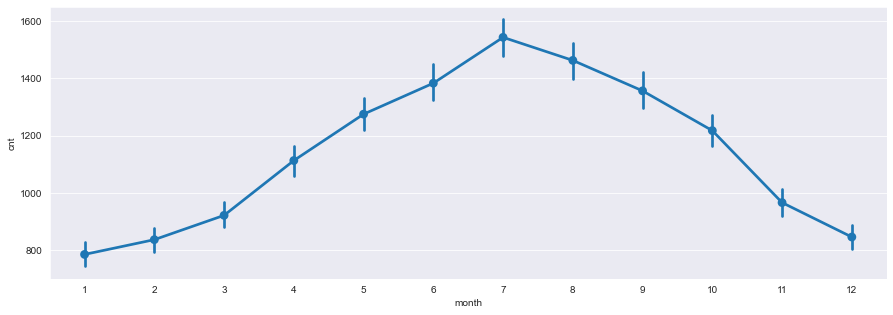

In [63]:
plt.figure(figsize=(15, 5))
sns.pointplot(x='month', y='cnt',data=df2);

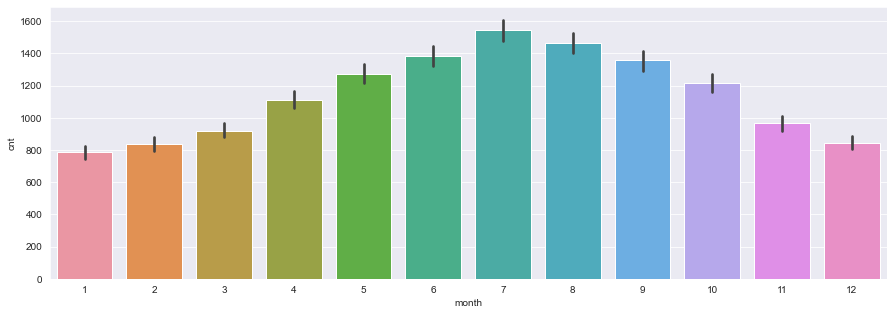

In [64]:
plt.figure(figsize=(15, 5))
sns.barplot(x='month', y='cnt',data=df2);

In [68]:
df2.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,day_of_week,time,year_month
timestamp,,,,,,,,,,,,,,,
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,1,19,2017-01
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,1,20,2017-01
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,1,21,2017-01
2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,1,22,2017-01
2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0,2017,1,3,1,23,2017-01


10- Bike shares by year

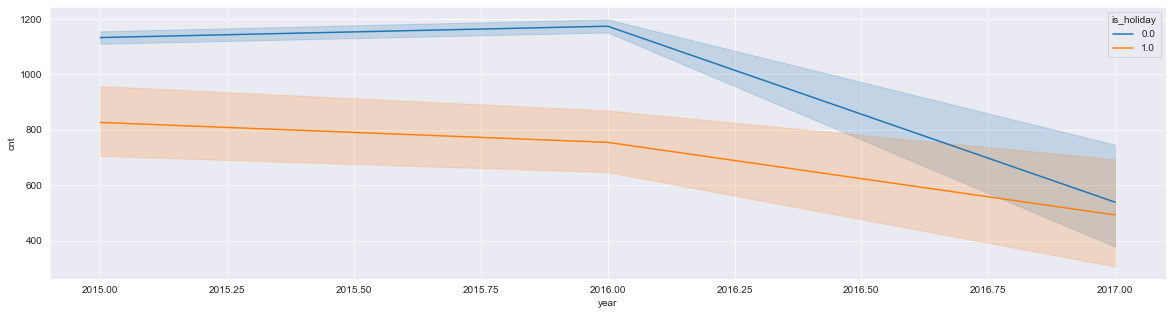

In [69]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='year', y='cnt',data=df2, hue='is_holiday');

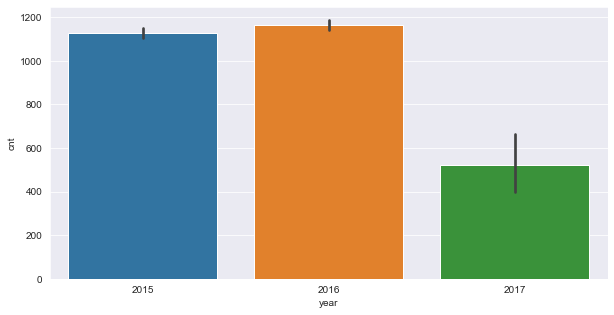

In [78]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='cnt',data=df2);

11- Bike Share by day of week

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

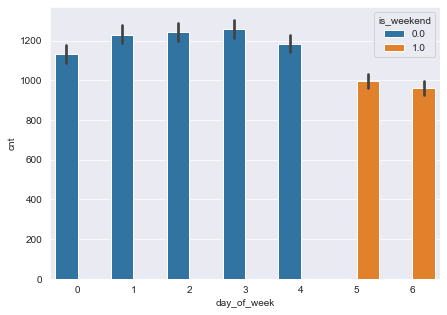

In [74]:
plt.figure(figsize=(7,5))
sns.barplot(x="day_of_week", y="cnt", data=df2, hue='is_weekend')

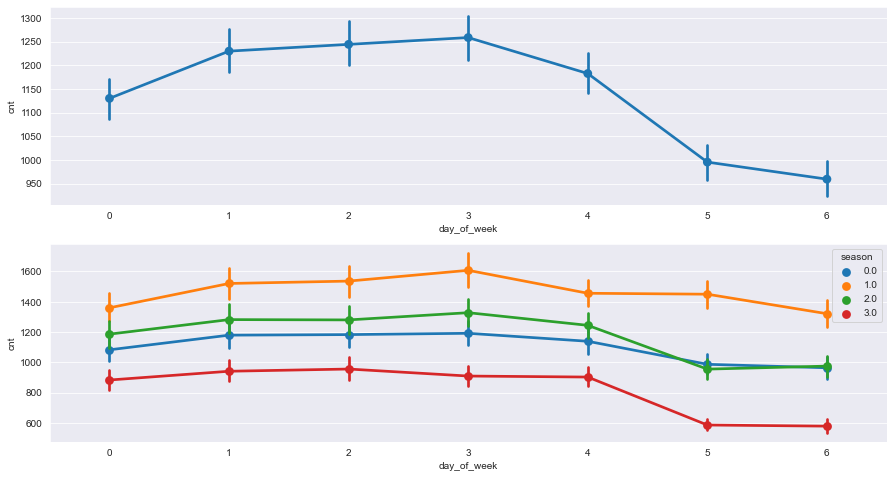

In [76]:
fig,(ax1, ax2)= plt.subplots(nrows=2)
fig.set_size_inches(15,8) 

sns.pointplot(data=df2, x='day_of_week', y='cnt',ax=ax1)
sns.pointplot(x="day_of_week",y="cnt", data = df2,hue="season",ax=ax2)
plt.show()

12- Bike share by weekday/weekend

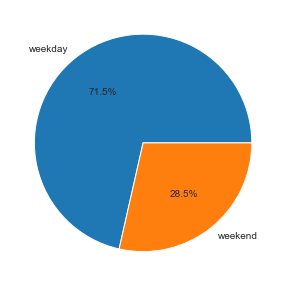

In [80]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.is_weekend.value_counts().values, 
       labels=['weekday','weekend'], 
       autopct='%.1f%%',    
       )
plt.show()

13- Weather codes by season

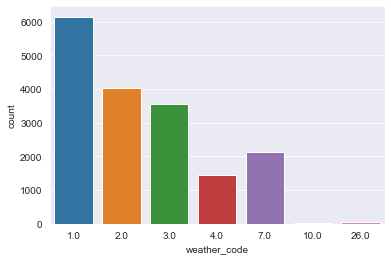

In [82]:
sns.countplot(x='weather_code', data=df2);

Scatterplot

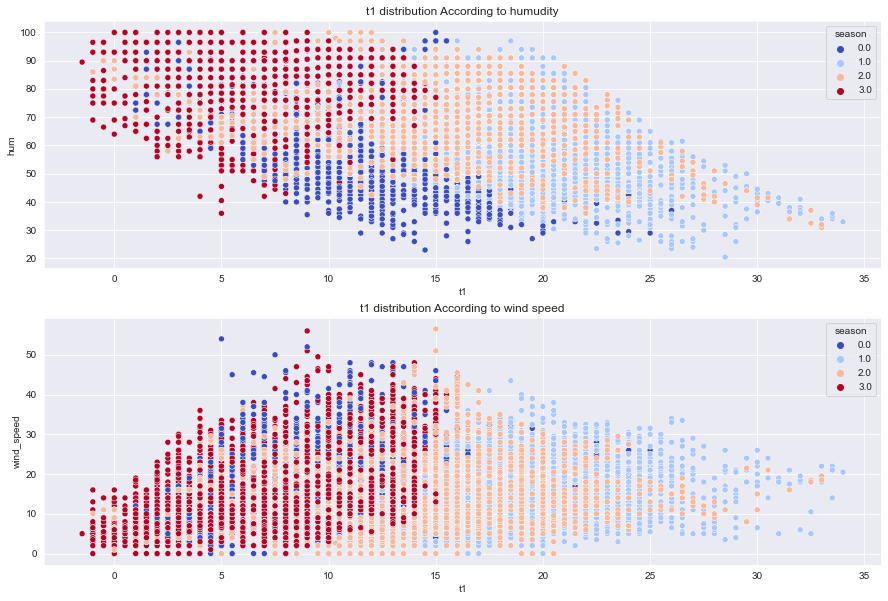

In [83]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.title("t1 distribution According to humudity")
sns.scatterplot(x="t1",y="hum",data=df, hue='season',palette="coolwarm")

plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");